In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data=pd.read_csv('/home/ayushi/Downloads/Retail.csv',parse_dates=['time'],index_col='time')

In [3]:
data.head()

,ID1,ID2,value
time,,,
2010-11-13,1,2,130
2010-11-20,1,2,222
2010-11-27,1,2,166
2010-12-04,1,2,174
2010-12-11,1,2,236


In [139]:
type(data.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [144]:
data.index

DatetimeIndex(['2010-11-13', '2010-11-20', '2010-11-27', '2010-12-04',
               '2010-12-11', '2010-12-18', '2010-12-25', '2011-01-01',
               '2011-01-08', '2011-01-15',
               ...
               '2013-10-19', '2013-10-26', '2013-11-09', '2013-11-16',
               '2013-11-23', '2013-11-30', '2013-12-07', '2013-12-14',
               '2013-12-21', '2013-12-28'],
              dtype='datetime64[ns]', name='time', length=2459, freq=None)

In [145]:
data['2010']

,ID1,ID2,value
time,,,
2010-11-13,1,2,130
2010-11-20,1,2,222
2010-11-27,1,2,166
2010-12-04,1,2,174
2010-12-11,1,2,236
2010-12-18,1,2,350
2010-12-25,1,2,216
2010-11-06,2,1,144
2010-11-13,2,1,142


In [147]:
data['2010-12-18'].value.mean()# mean value of 2010

449.46666666666664

In [149]:
data['2010-12-25'].value.sum()

6346

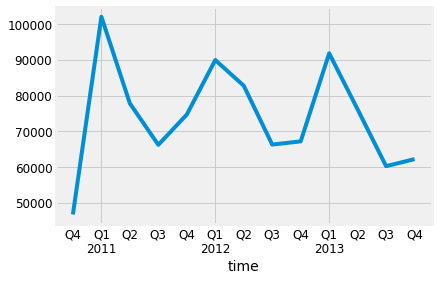

In [155]:
data.value.resample('Q').sum().plot()

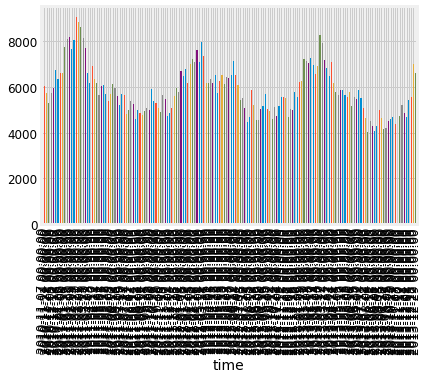

In [171]:
data.value.resample('W').sum().plot(kind='bar')

In [158]:
# rng=pd.date_range(start='06/01/2017',end='06/30/2017',freq='B') # to generate dates
# rng
#df.set_index(rng,inplace=True)

In [169]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
pd.date_range(start='06/01/2017',end='06/30/2017',freq=usb) #to exclude holidays
# to create your own calendar ,import AbstractHolidayCalendar.

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='C')

In [80]:
from datetime import datetime
con=data['time']
data['time']=pd.to_datetime(data['time'])

In [81]:
import math as m
a=data.groupby('time')['value'].sum()
a=pd.DataFrame(a)
tz=a['value']
tz.head(10)

time
2010-11-06    4940
2010-11-13    6062
2010-11-20    5730
2010-11-27    5296
2010-12-04    5732
2010-12-11    5974
2010-12-18    6742
2010-12-25    6346
2011-01-01    6594
2011-01-08    6624
Name: value, dtype: int64

In [82]:
a['log_value']=np.log(a['value'])

In [83]:
a.columns

Index(['value', 'log_value'], dtype='object')

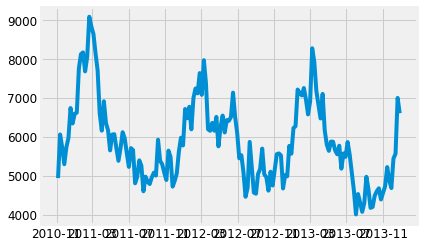

In [85]:
plt.plot(a['value'])

In [87]:
y=a['log_value'].resample('MS').mean()

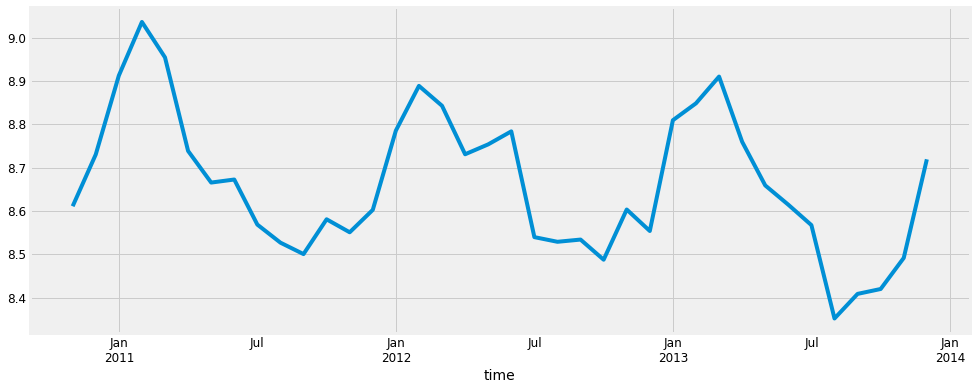

In [89]:
y.plot(figsize=(15, 6))
plt.show()

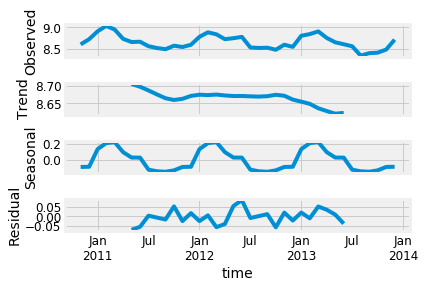

In [88]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [90]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [101]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:266.80735148928767
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:964.5452991983633
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-43.206955343075535


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-47.62606880503096
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-48.49243998180903
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-22.222380710719737


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:262.01102247015353
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1969.522346186181
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-41.82624144010323
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-46.36661988649266
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-43.97416102024093
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-20.943865997741113
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-51.0796310508032
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-35.060557539237635
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-39.50836639074314
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-16.862288031111714
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-50.338447960802135


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1008.8028214080496
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-36.94137628609472
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-40.92590735618053


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-28.894704250727017
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-19.06122886267069
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-50.50323138963655
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1039.388064309343
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-44.14166143860713
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-43.72401782359266
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-47.334589548149445
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-18.641298361572353
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-48.307607893847006


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:994.8104630132656
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-41.390607862241616
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-42.190272015515056


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-42.55863421070103
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-17.75467346666816
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-50.95118370195471
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1127.9707907418067
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-38.238757893051435


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-38.51188924644158


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-35.89584850389889
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-16.373553945585527
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-48.365597917997334


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1057.5370225793474
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-36.05559948586277
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-36.55436699119669
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-30.252017005911306
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-16.179662628672638


In [129]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2344      0.235      0.996      0.319      -0.227       0.695
sigma2         0.0127      0.003      4.235      0.000       0.007       0.019


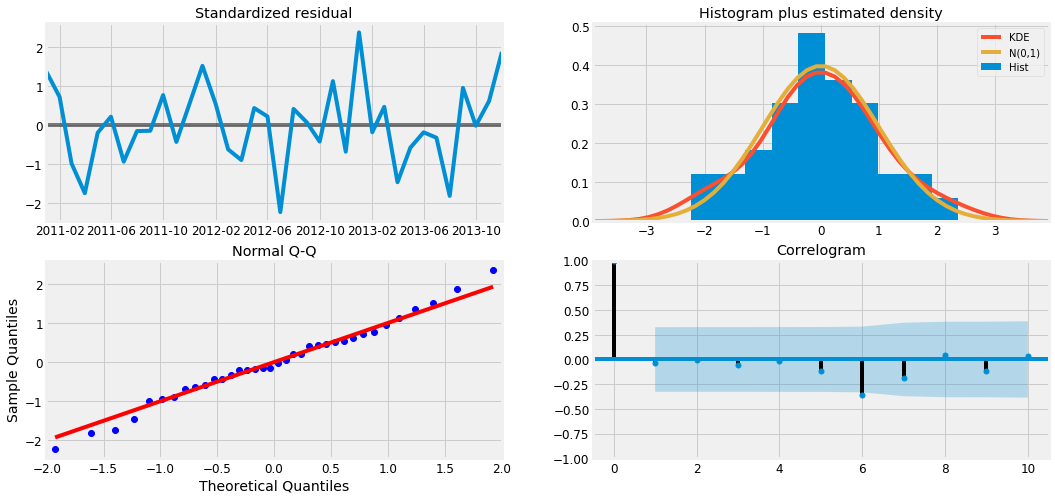

In [130]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

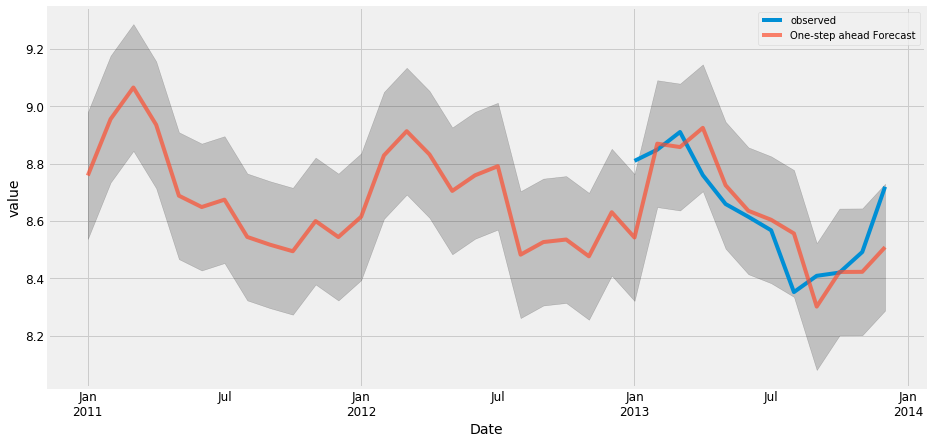

In [131]:
pred = results.get_prediction(start=pd.to_datetime('2011-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()

In [132]:
y_forecasted = pred.predicted_mean
y_truth = y['2011-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [133]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.11


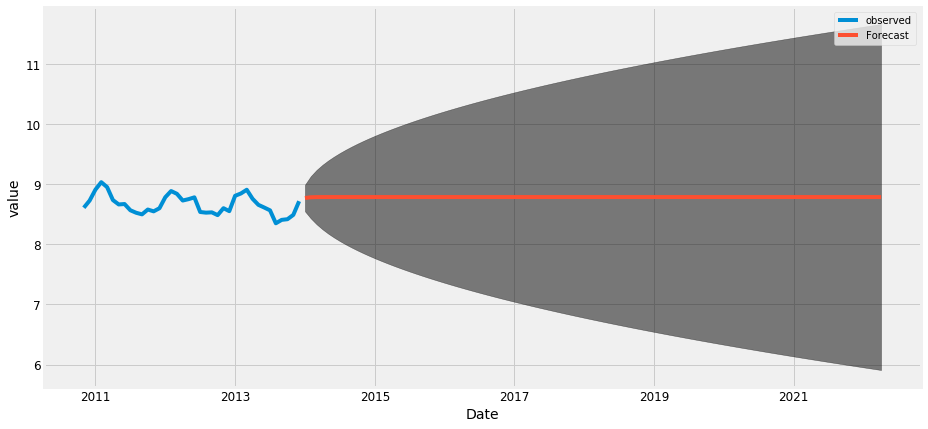

In [134]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.50)
ax.set_xlabel('Date')
ax.set_ylabel('value')
plt.legend()
plt.show()